===================================================================================================================

In [ ]:
import pandas as pd
from math import*
from numpy import*
from pylab import*
import numpy as np
import matplotlib.pyplot as plt
from pylab import*
import numpy as np
import xarray as xr
import matplotlib
import scipy.stats as st

In [ ]:
!pip install cartopy

In [ ]:
import cartopy

In [ ]:
from netCDF4 import Dataset
import netCDF4 as nc

In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [ ]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 

In [ ]:
!pip install cartopy
!pip install --no-binary shapely shapely --force

  Using cached Shapely-1.8.0.tar.gz (278 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=('chirps-v2.0.1981.2015.days_p10.nc')
info= nc.Dataset(data)
info

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Wed Nov 24 08:08:39 2021: cdo -z zip cat chirps_p1/chirps-v2.0.1981.days_p1.nc chirps_p1/chirps-v2.0.1982.days_p1.nc chirps_p1/chirps-v2.0.1983.days_p1.nc chirps_p1/chirps-v2.0.1984.days_p1.nc chirps_p1/chirps-v2.0.1985.days_p1.nc chirps_p1/chirps-v2.0.1986.days_p1.nc chirps_p1/chirps-v2.0.1987.days_p1.nc chirps_p1/chirps-v2.0.1988.days_p1.nc chirps_p1/chirps-v2.0.1989.days_p1.nc chirps_p1/chirps-v2.0.1990.days_p1.nc chirps_p1/chirps-v2.0.1991.days_p1.nc chirps_p1/chirps-v2.0.1992.days_p1.nc chirps_p1/chirps-v2.0.1993.days_p1.nc chirps_p1/chirps-v2.0.1994.days_p1.nc chirps_p1/chirps-v2.0.1995.days_p1.nc chirps_p1/chirps-v2.0.1996.days_p1.nc chirps_p1/chirps-v2.0.1997.days_p1.nc chirps_p1/chirps-v2.0.1998.days_p1.nc chirps_p1/chirps-v2.0.1999.days_p1.nc chirps_p1/chirps-v2.0.2000.days_p1.nc chirps

In [ ]:
precipitation=xr.open_dataarray(data)
precipitation

<xarray.DataArray 'rain' (time: 12783, lat: 302, lon: 601)>
[2320140066 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 89.95 90.05 90.15 90.25 ... 149.7 149.8 149.9 150.0
  * lat      (lat) float64 -15.05 -14.95 -14.85 -14.75 ... 14.85 14.95 15.05
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2015-12-31

Mengambil Point of Interest : Provinsi Bali

In [ ]:
Bali=precipitation.sel(lon=slice(114.15,116),lat=slice(-8.85,-8))
Bali

<xarray.DataArray 'rain' (time: 12783, lat: 9, lon: 19)>
[2185893 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 114.2 114.3 114.4 114.5 ... 115.7 115.8 115.9 116.0
  * lat      (lat) float64 -8.85 -8.75 -8.65 -8.55 -8.45 -8.35 -8.25 -8.15 -8.05
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2015-12-31

In [ ]:
Bali[0,:,:] #cek

<xarray.DataArray 'rain' (lat: 9, lon: 19)>
array([[      nan,       nan, 57.91984 , 52.899723, 47.248264, 38.546036,
              nan,       nan,       nan, 68.04848 , 64.50902 , 59.114357,
              nan, 41.016052, 31.207413, 19.432617,       nan, 20.526611,
        20.467817],
       [      nan,       nan, 32.38123 , 30.496479, 34.34642 , 30.238585,
              nan,       nan,       nan,       nan, 57.13418 , 48.585903,
        27.64701 , 31.635368, 25.35957 , 17.874952,       nan, 19.141562,
        19.660559],
       [24.351301, 23.335747, 20.857004, 20.525444, 21.913366, 22.30831 ,
              nan,       nan, 24.868147, 38.167736, 37.704956, 32.926907,
        29.224096, 27.907217, 21.356415, 17.163794,       nan,       nan,
              nan],
       [25.165356, 23.052992, 21.02763 , 20.717209,       nan,       nan,
              nan, 26.082815, 25.465832, 31.831694, 37.97182 , 34.11837 ,
        27.99922 , 29.82442 , 24.358063, 19.929174,       nan,       nan,
        16.92774 ],
       [20.85458 , 19.775557, 19.271553,       nan, 19.4107  , 20.947334,
        24.848188, 26.374516, 26.973394, 35.18733 , 41.592274, 37.985092,
        35.825455, 35.339073, 26.100155, 20.316355, 19.933622,       nan,
        16.804014],
       [22.044456, 19.084711, 18.633015, 10.188616, 19.974627, 22.001457,
        26.282661, 29.687016, 31.806814, 42.753967, 48.209442, 45.285297,
        45.31524 , 43.68641 , 31.129011, 21.803179, 21.025345,       nan,
        18.62532 ],
       [21.034338, 19.462357, 15.217031, 17.066343, 18.895555, 18.629137,
        21.064365, 22.414127, 23.808868, 30.338175, 33.12102 , 33.243343,
        31.34373 , 27.23521 , 18.921019, 22.530005,       nan,       nan,
              nan],
       [23.652576, 22.04474 , 17.929531, 17.625465, 15.666505, 11.866535,
        12.51332 , 13.555961, 13.562282, 11.957373, 12.299005, 13.407645,
        12.815784, 11.62193 ,       nan,       nan,       nan,       nan,
              nan],
       [27.772894, 22.725588, 20.349144, 18.709957, 20.713846,       nan,
              nan,       nan,       nan, 10.678479, 11.193642, 11.77357 ,
        12.147892,       nan,       nan,       nan,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 114.2 114.3 114.4 114.5 ... 115.7 115.8 115.9 116.0
  * lat      (lat) float64 -8.85 -8.75 -8.65 -8.55 -8.45 -8.35 -8.25 -8.15 -8.05
    time     datetime64[ns] 1981-01-01

In [ ]:
data_bali_cek=Bali.to_dataframe('CH')

In [ ]:
data_bali_cek

CH
time       lat   lon              
1981-01-01 -8.85 114.15        NaN
                 114.25        NaN
                 114.35  57.919842
                 114.45  52.899723
                 114.55  47.248264
...                            ...
2015-12-31 -8.05 115.55        NaN
                 115.65        NaN
                 115.75        NaN
                 115.85        NaN
                 115.95        NaN

[2185893 rows x 1 columns]

In [ ]:
# data_bali_cek.where(data_bali_cek.values>0)

## Data Processing

Akumulasi tahunan Maksimum

In [ ]:
pr_akumulasi_tahunan_bali= Bali.groupby('time.year').sum()
pr_akumulasi_tahunan_bali.to_dataframe('Sum')

Sum
year lat   lon                
1981 -8.85 114.15     0.000000
           114.25     0.000000
           114.35  1745.430298
           114.45  1664.298828
           114.55  1701.695923
...                        ...
2015 -8.05 115.55     0.000000
           115.65     0.000000
           115.75     0.000000
           115.85     0.000000
           115.95     0.000000

[5985 rows x 1 columns]

In [ ]:
akumulasi_ch_maximum = Bali.groupby('time.year').sum().max('year')
akumulasi_ch_maximum

<xarray.DataArray 'rain' (lat: 9, lon: 19)>
array([[   0.    ,    0.    , 2274.8254, 2142.4558, 2233.0579, 2329.6614,
           0.    ,    0.    ,    0.    , 2641.2349, 2544.3093, 2395.215 ,
           0.    , 1957.794 , 2045.9664, 2071.6528,    0.    , 2406.6099,
        2353.6445],
       [   0.    ,    0.    , 2312.449 , 2206.895 , 2252.1223, 2325.7102,
           0.    ,    0.    ,    0.    ,    0.    , 2596.3848, 2474.1145,
        2015.2687, 1923.0261, 1832.2394, 2075.5842,    0.    , 2334.336 ,
        2470.037 ],
       [2886.3118, 2779.4106, 2561.5288, 2508.0916, 2477.6812, 2443.462 ,
           0.    ,    0.    , 3306.8137, 3167.324 , 2744.2424, 2548.3992,
        2642.0442, 2054.6763, 1774.9578, 1847.2004,    0.    ,    0.    ,
           0.    ],
       [3056.687 , 2832.8167, 2705.4377, 2731.1772,    0.    ,    0.    ,
           0.    , 2944.569 , 3298.313 , 3602.329 , 3422.5513, 3010.0747,
        2945.3423, 2667.625 , 2678.0898, 2659.4033,    0.    ,    0.    ,
        2739.0203],
       [3443.3499, 2990.356 , 2750.2354,    0.    , 2838.278 , 2743.7036,
        2780.8425, 2975.9724, 3294.8452, 3636.8901, 3480.1006, 3172.9443,
        3161.7322, 3138.3418, 3183.2454, 2954.36  , 2777.833 ,    0.    ,
        2914.214 ],
       [3743.6687, 3025.1174, 2669.481 , 3019.0967, 2882.5945, 2913.7034,
        3023.1584, 3262.932 , 3403.7947, 3700.5781, 3484.148 , 3084.4143,
        3158.7678, 3486.3582, 3337.7808, 2775.3672, 2696.579 ,    0.    ,
        2657.5393],
       [3473.6753, 2906.6548, 2249.4988, 2554.3435, 2825.979 , 3202.0608,
        3195.5015, 3162.5747, 3203.1301, 3472.4758, 3314.775 , 2803.8364,
        2681.177 , 2685.4307, 2288.9534, 2384.09  ,    0.    ,    0.    ,
           0.    ],
       [3958.2915, 3265.3123, 2557.3704, 2491.4917, 2459.5566, 2597.876 ,
        2596.83  , 2542.7954, 2526.0408, 2171.433 , 2317.7122, 2407.1206,
        2367.4456, 2126.6072,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ],
       [4031.171 , 3555.1345, 2641.4573, 2388.5889, 2319.6514,    0.    ,
           0.    ,    0.    ,    0.    , 1900.5156, 1989.143 , 2090.2634,
        2051.2346,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 114.2 114.3 114.4 114.5 ... 115.7 115.8 115.9 116.0
  * lat      (lat) float64 -8.85 -8.75 -8.65 -8.55 -8.45 -8.35 -8.25 -8.15 -8.05

/usr/local/lib/python3.7/dist-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


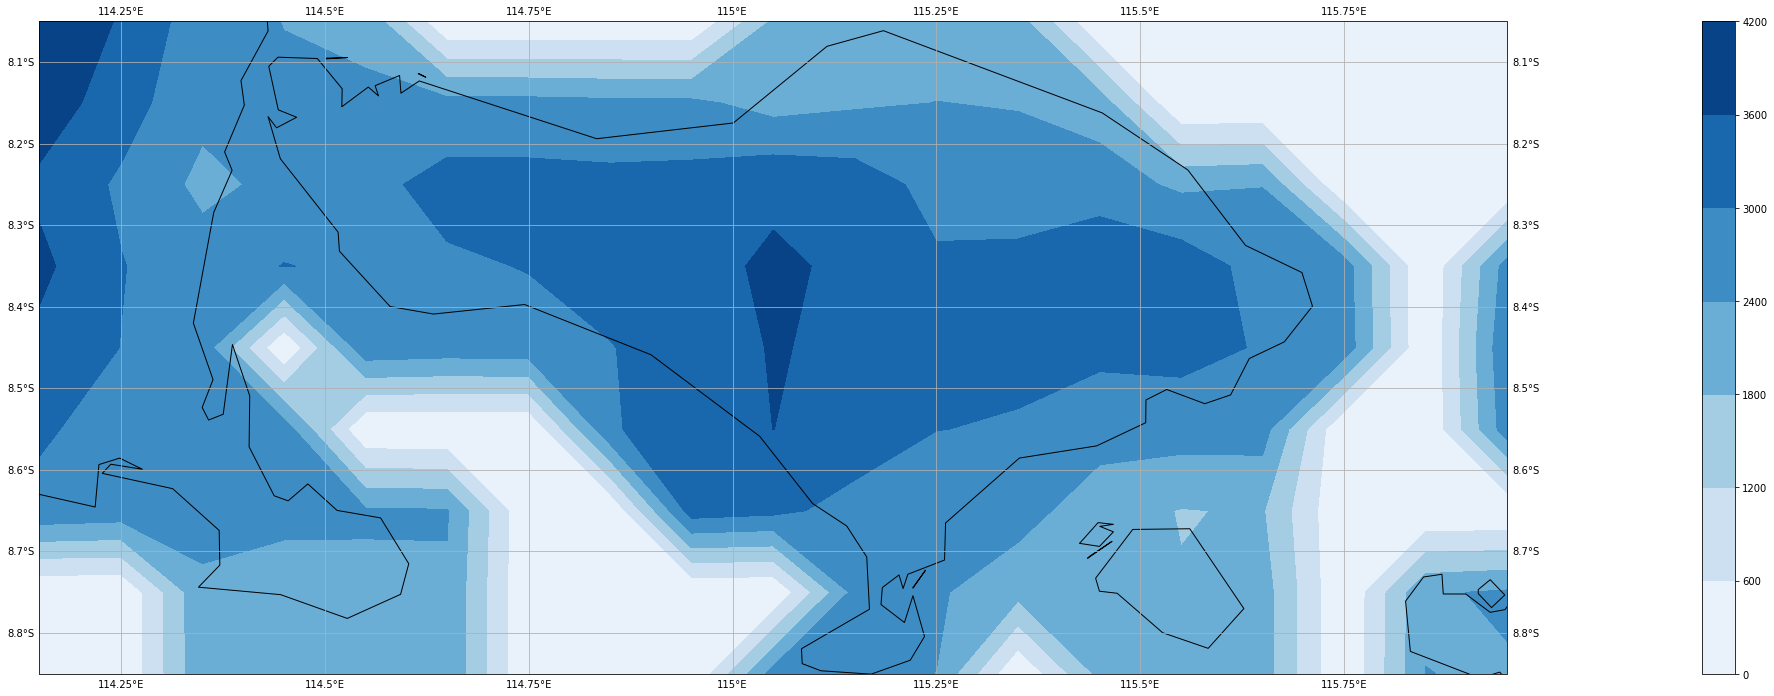

In [ ]:
mproj=ccrs.PlateCarree()

fig = plt.figure(figsize=(70,12))
ax = plt.axes(projection=mproj)

cf=ax.contourf(Bali.lon,Bali.lat,akumulasi_ch_maximum,  
               cmap=plt.cm.Blues, 
               transform=mproj)  
cb = plt.colorbar(cf) 


ax.add_feature(cfeature.GSHHSFeature(scale='intermediate')) 
ax.gridlines(draw_labels=True) 

______________________________________________________________________________________________

===================================================================================================================

Annual Maxima di setiap titik

In [ ]:
pr_annualmaxima = Bali.groupby('time.year').max()
pr_annualmaxima

<xarray.DataArray 'rain' (year: 35, lat: 9, lon: 19)>
array([[[       nan,        nan,  57.91984 , ...,        nan,
          89.94168 ,  56.970455],
        [       nan,        nan,  43.754745, ...,        nan,
          58.184032,  54.871674],
        [ 67.225006,  54.88663 ,  49.056526, ...,        nan,
                nan,        nan],
        ...,
        [ 82.83603 ,  86.07045 ,  63.79357 , ...,        nan,
                nan,        nan],
        [ 88.684265,  72.159515,  50.196518, ...,        nan,
                nan,        nan],
        [ 71.88113 , 112.80771 ,  67.47356 , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,  48.62797 , ...,        nan,
          50.60699 ,  59.044292],
        [       nan,        nan,  46.0556  , ...,        nan,
          47.859028,  50.74057 ],
        [ 59.178097,  67.63385 ,  62.56246 , ...,        nan,
                nan,        nan],
...
        [ 62.291954,  48.731544,  66.4765  , ...,        nan,
                nan,        nan],
        [ 67.3989  ,  67.23167 ,  95.22401 , ...,        nan,
                nan,        nan],
        [ 65.39365 ,  69.05616 , 102.69147 , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,  59.38468 , ...,        nan,
          40.300518,  35.600933],
        [       nan,        nan,  59.614883, ...,        nan,
          54.451828,  55.07031 ],
        [ 78.90659 ,  73.97158 ,  60.62568 , ...,        nan,
                nan,        nan],
        ...,
        [ 70.37978 ,  70.54345 ,  47.49295 , ...,        nan,
                nan,        nan],
        [ 60.968777,  65.77971 ,  56.976536, ...,        nan,
                nan,        nan],
        [ 65.70701 ,  64.32436 ,  55.309353, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 114.2 114.3 114.4 114.5 ... 115.7 115.8 115.9 116.0
  * lat      (lat) float64 -8.85 -8.75 -8.65 -8.55 -8.45 -8.35 -8.25 -8.15 -8.05
  * year     (year) int64 1981 1982 1983 1984 1985 ... 2011 2012 2013 2014 2015

Mencari jenis distribusi yang cocok digunakan dengan mengetes di 3 titik berbeda:

In [ ]:
!pip install pyextremes

In [ ]:
from pyextremes import EVA
import numpy as np

# 1. Titik ke-1

In [ ]:
CH_titik_1=Bali.sel(lon=115.75,lat=-8.45,method='nearest').fillna(0)

In [ ]:
model_titik_1 = EVA(data=CH_titik_1.to_series())

In [ ]:
model_titik_1.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",)

In [ ]:
model_titik_1.fit_model()
model_titik_1

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          rain      Size:                              12,783
Start:                       January 1981      End:                        December 2015
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 35      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f10c31a6850>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f10b4a8b910>))

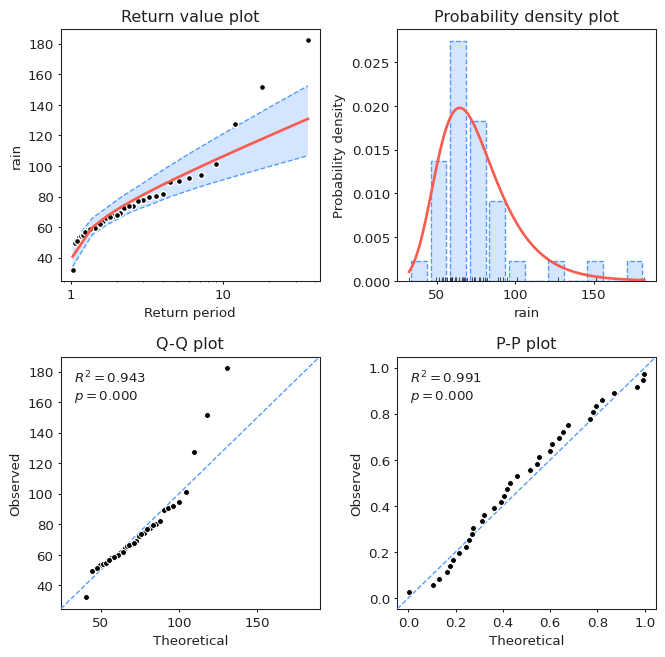

In [ ]:
model_titik_1.plot_diagnostic(alpha=0.95)

## 2. Titik ke-2

In [ ]:
CH_titik_2=Bali.sel(lon=115.45,lat=-8.30,method='nearest')

In [ ]:
model_titik_2 = EVA(data=CH_titik_2.to_series())

In [ ]:
model_titik_2.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",)

In [ ]:
model_titik_2.fit_model()
model_titik_2

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          rain      Size:                              12,783
Start:                       January 1981      End:                        December 2015
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 35      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f10b3785250>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f10b36ece10>))

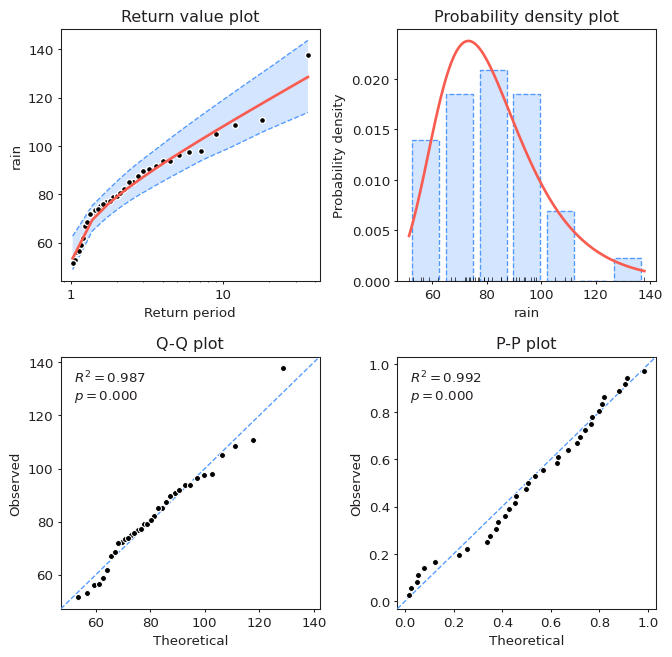

In [ ]:
model_titik_2.plot_diagnostic(alpha=0.95)

3. Titik ke-3

In [ ]:
CH_titik_3=Bali.sel(lon=115.10,lat=-8.70,method='nearest')

In [ ]:
model_titik_3 = EVA(data=CH_titik_3.to_series())

In [ ]:
model_titik_3.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",)

In [ ]:
model_titik_3.fit_model()
model_titik_3

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          rain      Size:                              12,783
Start:                       January 1981      End:                        December 2015
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 35      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f10b356e190>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f10b35112d0>))

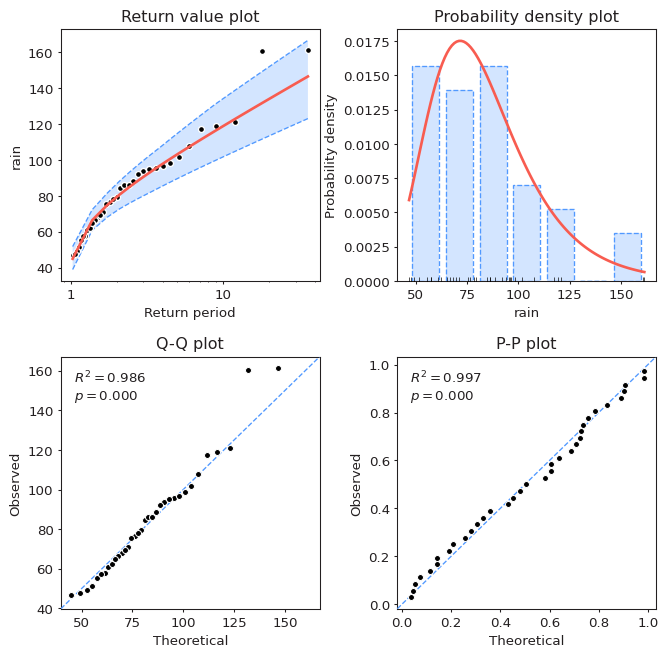

In [ ]:
model_titik_3.plot_diagnostic(alpha=0.95)

Didapatkan jenis distribusi yang dapat digunakan untuk menganalisa extreme value adalah gumbel right (gumbel_r)

____________________________________________________________________________

Perhitungan Periode Ulang Menggunakan Distribusi Gumbel Right

In [ ]:
dset_baru = Bali.where(Bali.values>0)
# dset_baru[393][:][:].plot() 

In [ ]:
from scipy.stats import gumbel_r

In [ ]:
#Periode Ulang 100 tahun

Fx = 0.99
w = 1
Mtrx_100 = np.zeros((len(dset_baru.lat), len(dset_baru.lon)))
pbar = ProgressBar()

for lat in pbar(range(len(dset_baru.lat))):
  for lon in (range(len(dset_baru.lon))):
    waktu=dset_baru[:,lat,lon].fillna(0)
    Annual_max=waktu.groupby('time.year').max()
    # print(Annual_max)
    parameter = gumbel_r.fit(Annual_max)
    Rx = gumbel_r.ppf(Fx,*parameter)
    print(Rx)
    # print(Rx)
    Mtrx_100[lat,lon] = Rx 

N/A% (0 of 9) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

4.383127204458636e-18
4.383127204458636e-18
129.2157845439425
126.67437677522449
116.9041175344171
138.31851242544707
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
151.52959791126028
132.68806852982166
137.88315483808668
4.383127204458636e-18
119.46033706600757


 11% (1 of 9) |##                        | Elapsed Time: 0:00:00 ETA:   0:00:05

109.66380082059968
105.03387034631946
4.383127204458636e-18
144.28864080788017
119.70912309297321
4.383127204458636e-18
4.383127204458636e-18
117.5352637334306
120.30575418412643
112.51001172257412
119.39648158755031
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
118.10126699522715
110.98315363031809
122.00038141362691
107.952505685489
104.6273432676289
113.84004121769699
4.383127204458636e-18
119.6164119409726


 22% (2 of 9) |#####                     | Elapsed Time: 0:00:01 ETA:   0:00:04

108.8960985343371
139.52406436472995
111.82922912687381
105.14879476465282
113.42252272603356
115.2414176748486
121.51089056004997
4.383127204458636e-18
4.383127204458636e-18
168.92211576874735
168.25150168033986
139.17089754148807
138.67939141189652
166.14334900665


 33% (3 of 9) |########                  | Elapsed Time: 0:00:02 ETA:   0:00:04

120.06250154940369
103.34414242089119
108.15424388177706
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
128.62100903407375
110.4955428499637
97.35231847572305
109.44974419282946
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
114.6358374766379
142.29293267268284
181.5530482466054
192.80349563143886
171.84575042951678
216.88273365505438
158.01369974568937


 44% (4 of 9) |###########               | Elapsed Time: 0:00:02 ETA:   0:00:03

140.87985618476998
149.63052797057318
4.383127204458636e-18
4.383127204458636e-18
120.26333271144482
127.5138941871485
108.71525233579537
102.00868368059986
4.383127204458636e-18
131.24916294048936
112.64880424657721
104.62022905891807
107.95707139414077
124.3274441544021
147.1228337467516
171.0194441131228
158.55938090149556
164.4954956394065
151.03256852177424
168.88432036490892
157.21620159967273


 55% (5 of 9) |##############            | Elapsed Time: 0:00:03 ETA:   0:00:02

150.01782846181408
4.383127204458636e-18
123.86486991329078
134.0162336512696
115.94516858821177
108.78486043406438
124.57519651500147
124.38142435942777
114.63240950053472
104.95867943267311
125.11709173465937
126.75944038811873
134.43396716139645
167.23063662859573
139.05519032325688


 66% (6 of 9) |#################         | Elapsed Time: 0:00:03 ETA:   0:00:01

125.91967183517141
144.52446673177457
143.8878088372606
130.5050708228112
141.04394244523542
4.383127204458636e-18
132.2326304561689
131.152362471174
120.61163070824045
105.92164739698683
99.12060844118355
101.87529078405086
115.42974097089399
120.36133689476387
114.42133956394412
118.96513180959649
137.65091794087704
141.65521568645295
108.62828526545668
106.16183857842631
124.37996366150412
113.55240988841686
121.02523465463787


 77% (7 of 9) |####################      | Elapsed Time: 0:00:04 ETA:   0:00:01

4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
138.7974891162798
112.58802601382774
96.26668562713607
89.31361590069679
90.05073289635976
104.9291856809064
104.33186578309343
103.52856294543432
99.06556920120573
101.82293360681368
104.45124371835931
107.38595822265069
117.87628035793054
101.73917316367928
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18


 88% (8 of 9) |#######################   | Elapsed Time: 0:00:05 ETA:   0:00:00

4.383127204458636e-18
4.383127204458636e-18
139.72928717320178
141.02183321382154
102.84892111191141
87.96047675984292
89.81439951486647
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18
90.53299457126829
100.32716271275545
100.07903776214903
99.85131339646031
4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18


100% (9 of 9) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05


4.383127204458636e-18
4.383127204458636e-18
4.383127204458636e-18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

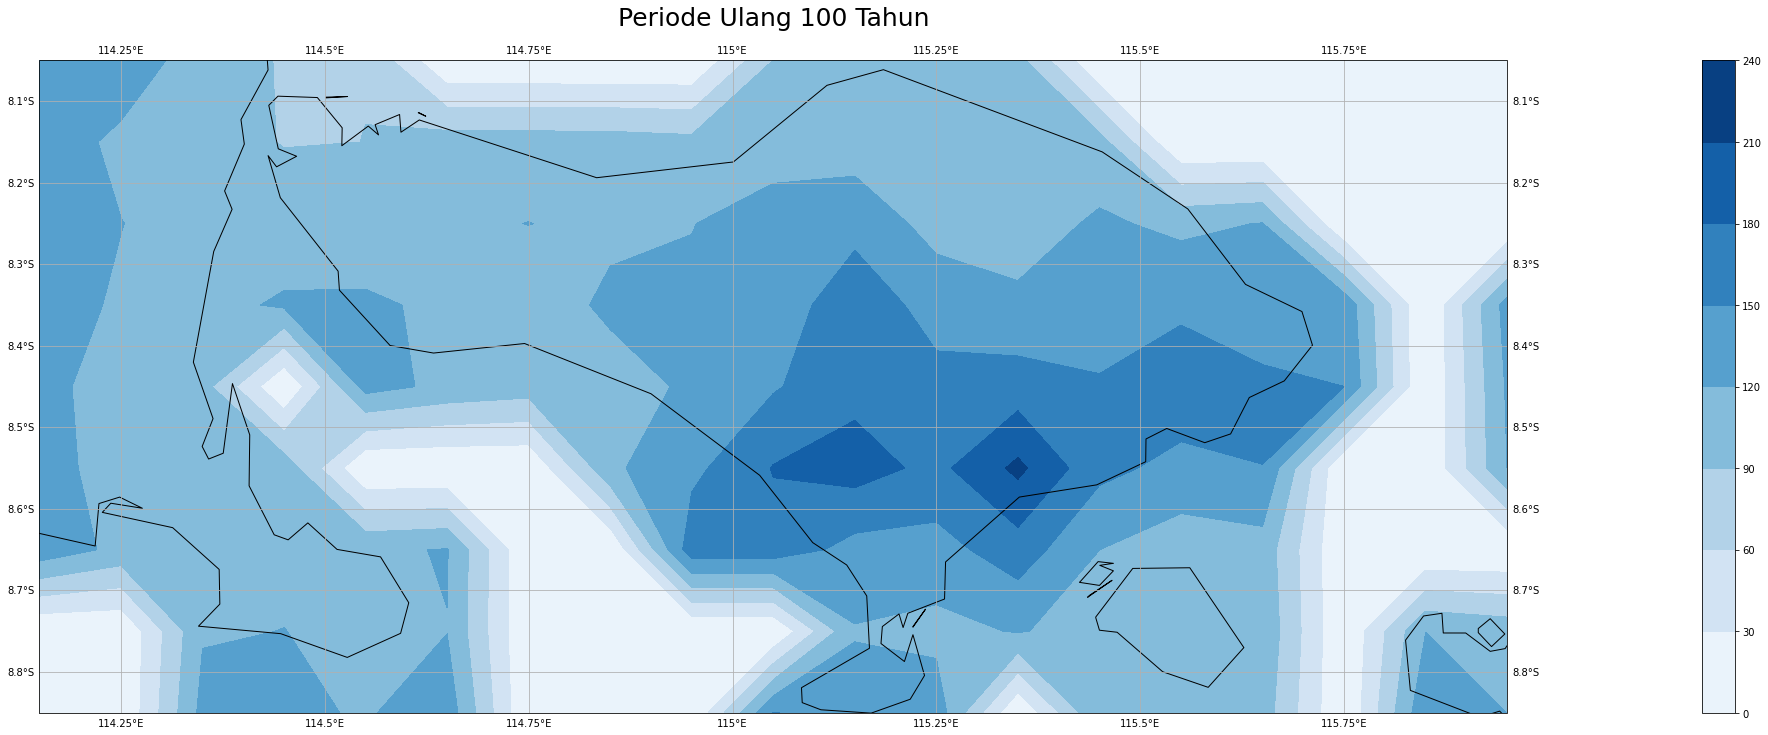

In [ ]:
mproj=ccrs.PlateCarree()

fig = plt.figure(figsize=(70,12))
ax = plt.axes(projection=mproj)

cf=ax.contourf(Bali.lon,Bali.lat,Mtrx_100,  
               cmap=plt.cm.Blues, 
               transform=mproj)  
cb = plt.colorbar(cf) 


ax.add_feature(cfeature.GSHHSFeature(scale='intermediate')) 
ax.gridlines(draw_labels=True) 


plt.title('Periode Ulang 100 Tahun', fontsize=25, pad=20)
plt.savefig('100 tahun.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.1,
        frameon=None, metadata=None)

#Download Gambar
from google.colab import files
files.download('100 tahun.png')

In [ ]:
#Periode Ulang 50 tahun

Fx_2 = 0.98 
w  = 1
Mtrx_50 = np.zeros((len(dset_baru.lat), len(dset_baru.lon)))
pbar = ProgressBar()

for i in pbar(range(len(dset_baru.lat))):
  for j in (range(len(dset_baru.lon))):
    waktu_2=dset_baru[:,i,j].fillna(0)
    Annual_max_2=waktu_2.groupby('time.year').max()
    # print(Annual_max)
    parameter_2= gumbel_r.fit(Annual_max_2)
    Rx_2= gumbel_r.ppf(Fx_2,*parameter_2)
    # print(Rx)
    Mtrx_50[i,j] = Rx_2 

100% (9 of 9) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

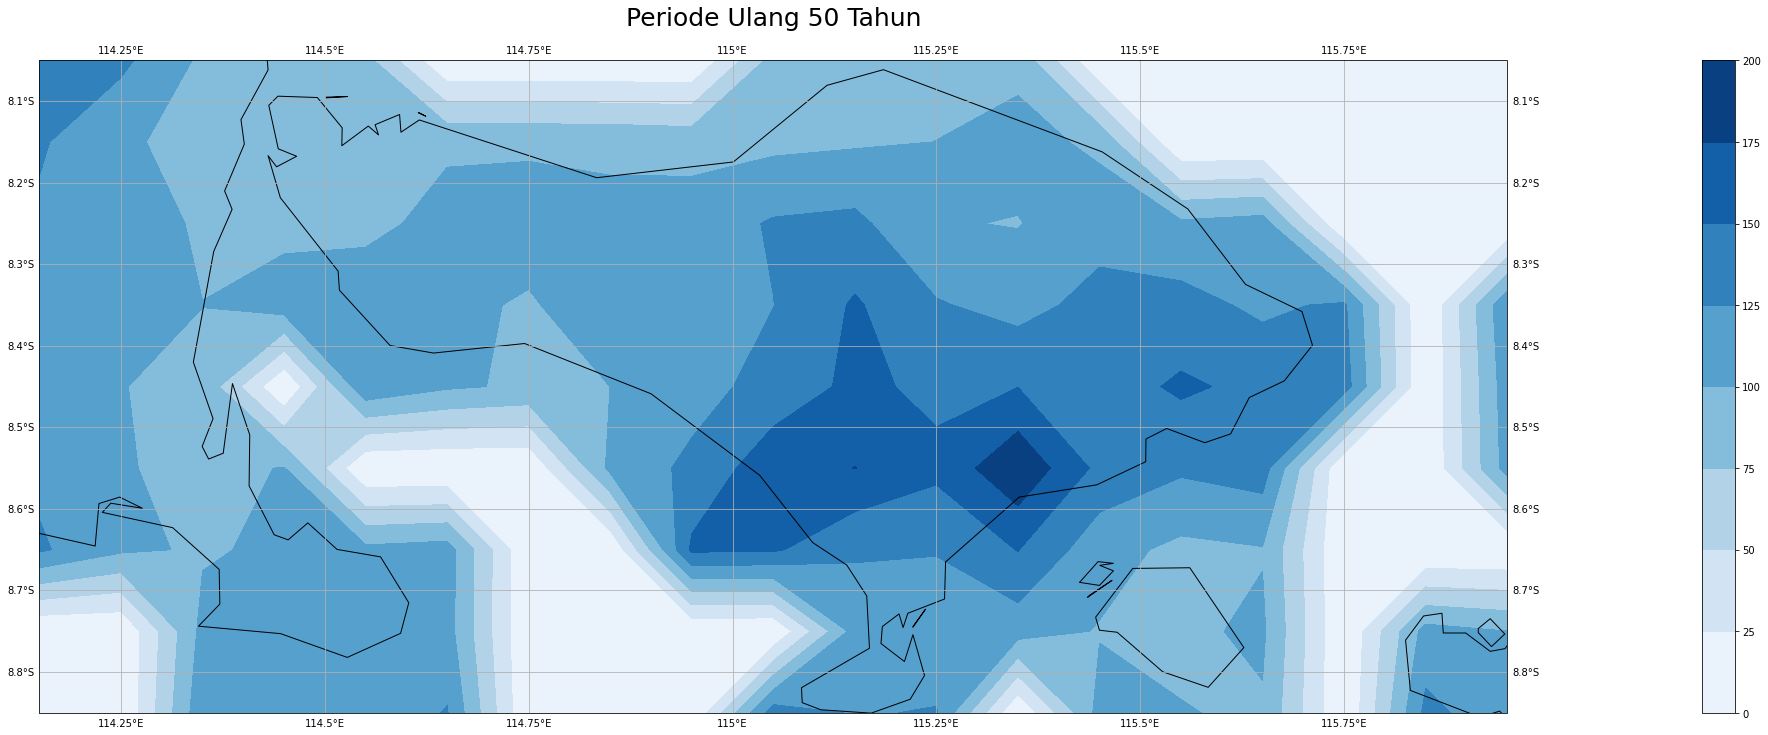

In [ ]:
mproj=ccrs.PlateCarree()

fig = plt.figure(figsize=(70,12))
ax = plt.axes(projection=mproj)

cf=ax.contourf(Bali.lon,Bali.lat,Mtrx_50,  
               cmap=plt.cm.Blues, 
               transform=mproj)  
cb = plt.colorbar(cf) 


ax.add_feature(cfeature.GSHHSFeature(scale='intermediate')) 
ax.gridlines(draw_labels=True) 

plt.title('Periode Ulang 50 Tahun', fontsize=25, pad=20)
plt.savefig('50 tahun.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.1,
        frameon=None, metadata=None)

#Download Gambar
from google.colab import files
files.download('50 tahun.png')

In [ ]:
#Periode Ulang 30 tahun

Fx_3 = 0.967
w  = 1
Mtrx_30 = np.zeros((len(dset_baru.lat), len(dset_baru.lon)))
pbar = ProgressBar()

for lat in pbar(range(len(dset_baru.lat))):
  for lon in (range(len(dset_baru.lon))):
    waktu_3=dset_baru[:,lat,lon].fillna(0)
    Annual_max_3=waktu_3.groupby('time.year').max()
    # print(Annual_max)
    parameter_3= gumbel_r.fit(Annual_max_3)
    Rx_3= gumbel_r.ppf(Fx_3,*parameter_3)
    # print(Rx)
    Mtrx_30[lat,lon] = Rx_3

100% (9 of 9) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

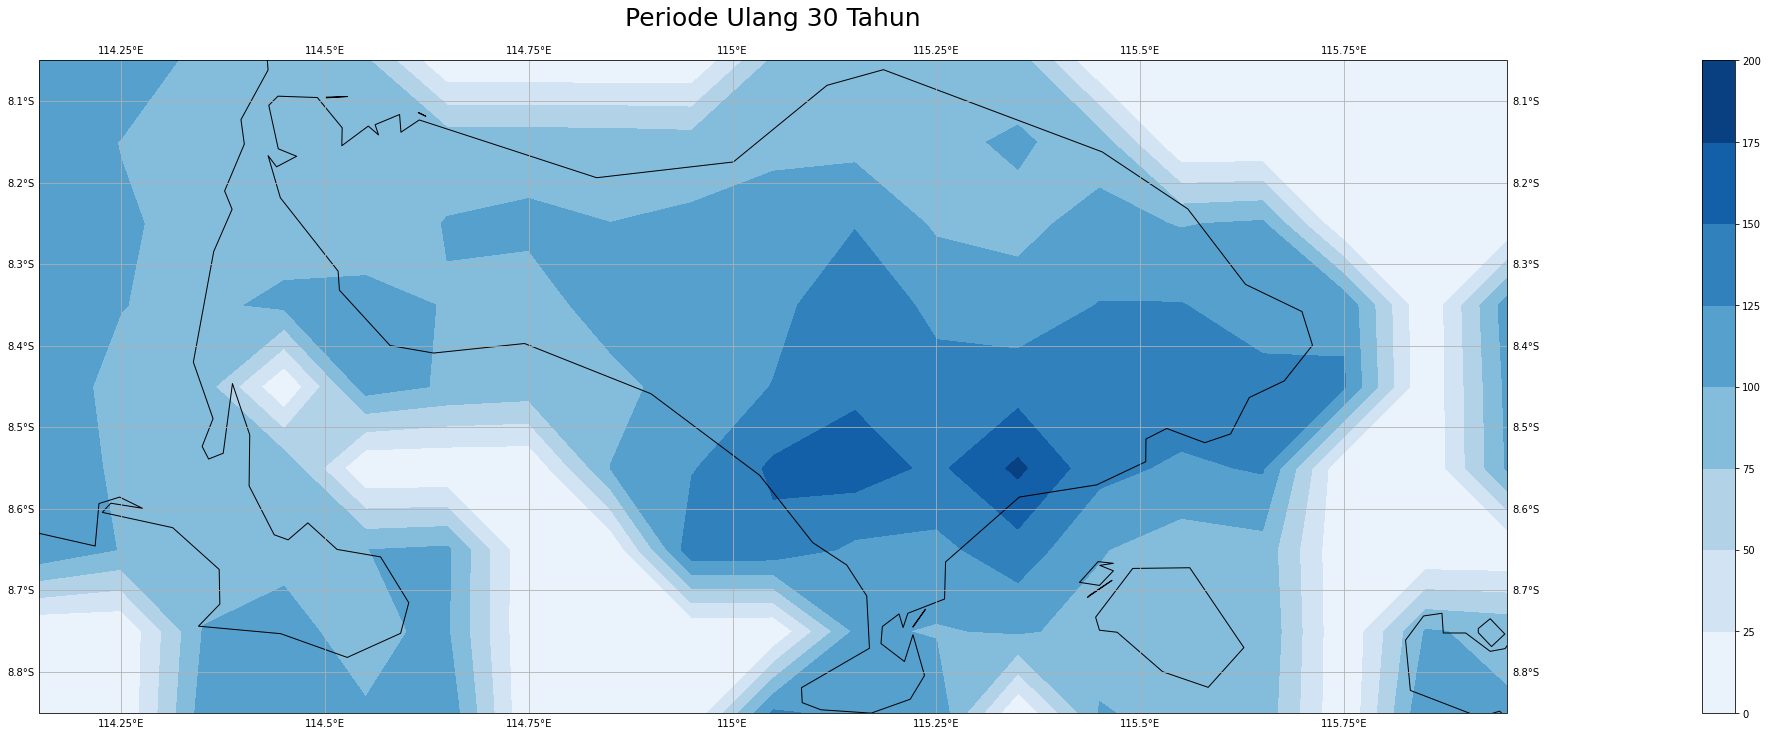

In [ ]:
mproj=ccrs.PlateCarree()

fig = plt.figure(figsize=(70,12))
ax = plt.axes(projection=mproj)

cf=ax.contourf(Bali.lon,Bali.lat,Mtrx_30,  
               cmap=plt.cm.Blues, 
               transform=mproj)  
cb = plt.colorbar(cf) 


ax.add_feature(cfeature.GSHHSFeature(scale='intermediate')) 
ax.gridlines(draw_labels=True) 

plt.title('Periode Ulang 30 Tahun', fontsize=25, pad=20)
plt.savefig('30 tahun.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.1,
        frameon=None, metadata=None)

#Download Gambar
from google.colab import files
files.download('30 tahun.png')

In [ ]:
#Periode Ulang 10 tahun

Fx_4 = 0.9
w  = 1
Mtrx_10 = np.zeros((len(dset_baru.lat), len(dset_baru.lon)))
pbar = ProgressBar()

for lat in pbar(range(len(dset_baru.lat))):
  for lon in (range(len(dset_baru.lon))):
    waktu_4=dset_baru[:,lat,lon].fillna(0)
    Annual_max_4=waktu_4.groupby('time.year').max()
    # print(Annual_max)
    parameter_4= gumbel_r.fit(Annual_max_4)
    Rx_4= gumbel_r.ppf(Fx_4,*parameter_4)
    # print(Rx_4)
    # print(Rx)
    Mtrx_10[lat,lon] = Rx_4

100% (9 of 9) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

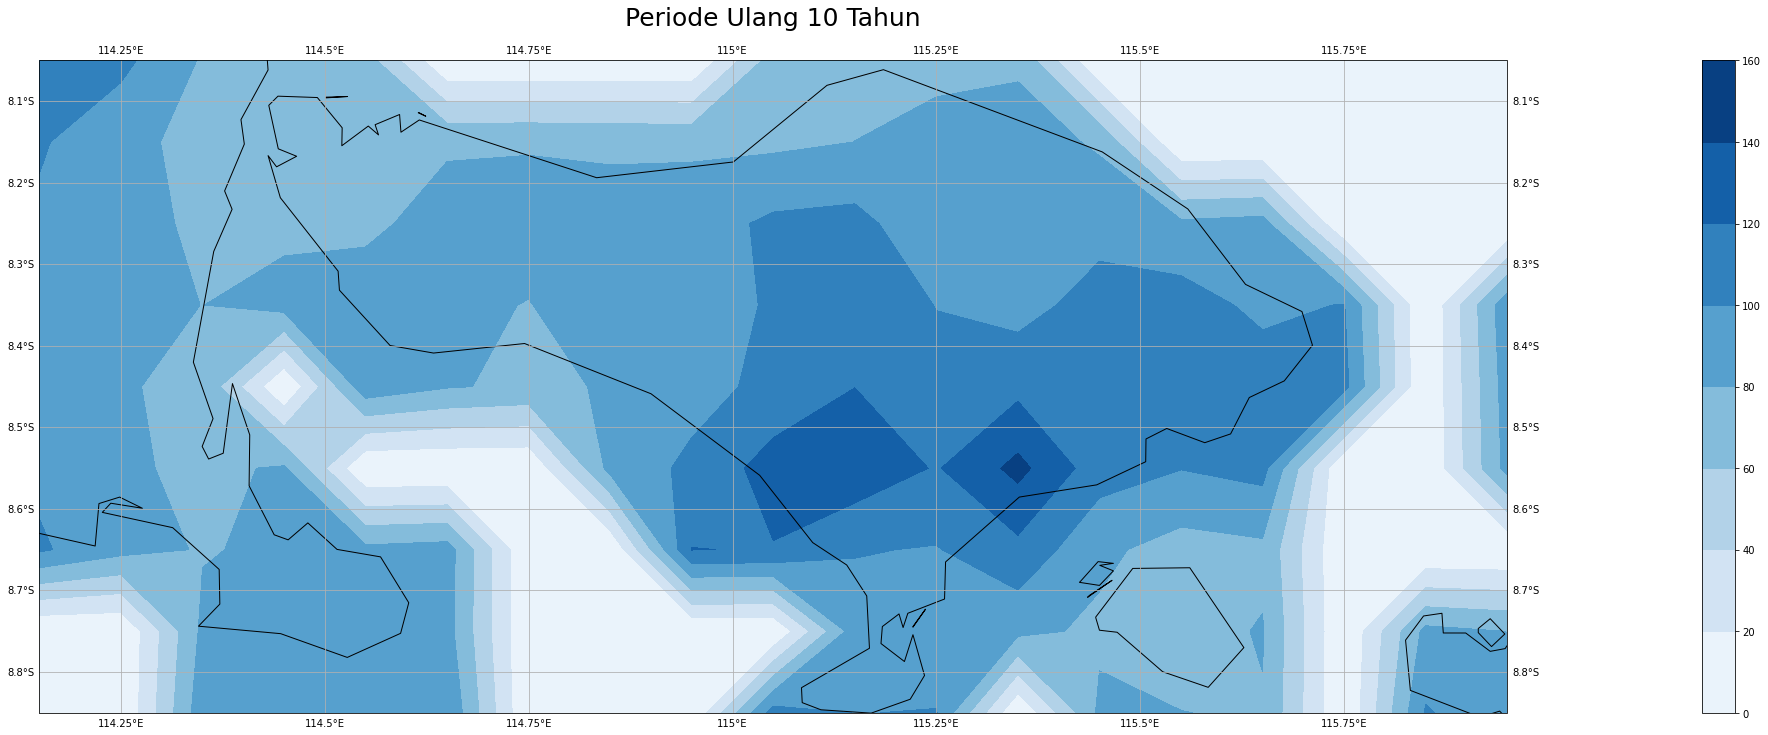

In [ ]:
mproj=ccrs.PlateCarree()

fig = plt.figure(figsize=(70,12))
ax = plt.axes(projection=mproj)

cf=ax.contourf(Bali.lon,Bali.lat,Mtrx_10,  
               cmap=plt.cm.Blues, 
               transform=mproj)  
cb = plt.colorbar(cf) 


ax.add_feature(cfeature.GSHHSFeature(scale='intermediate')) 
ax.gridlines(draw_labels=True) 

plt.title('Periode Ulang 10 Tahun', fontsize=25, pad=20)
plt.savefig('10 tahun.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.1,
        frameon=None, metadata=None)

#Download Gambar
from google.colab import files
files.download('10 tahun.png')

In [ ]:
#Periode Ulang 5 tahun

Fx_6 = 0.8
w  = 1
Mtrx_6 = np.zeros((len(dset_baru.lat), len(dset_baru.lon)))
pbar = ProgressBar()

for lat in pbar(range(len(dset_baru.lat))):
  for lon in (range(len(dset_baru.lon))):
    waktu_6=dset_baru[:,lat,lon].fillna(0)
    Annual_max_6=waktu_6.groupby('time.year').max()
    # print(Annual_max)
    parameter_6= gumbel_r.fit(Annual_max_6)
    Rx_6= gumbel_r.ppf(Fx_6,*parameter_6)
    # print(Rx)
    Mtrx_6[lat,lon] = Rx_6

100% (9 of 9) |##########################| Elapsed Time: 0:00:08 Time:  0:00:08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

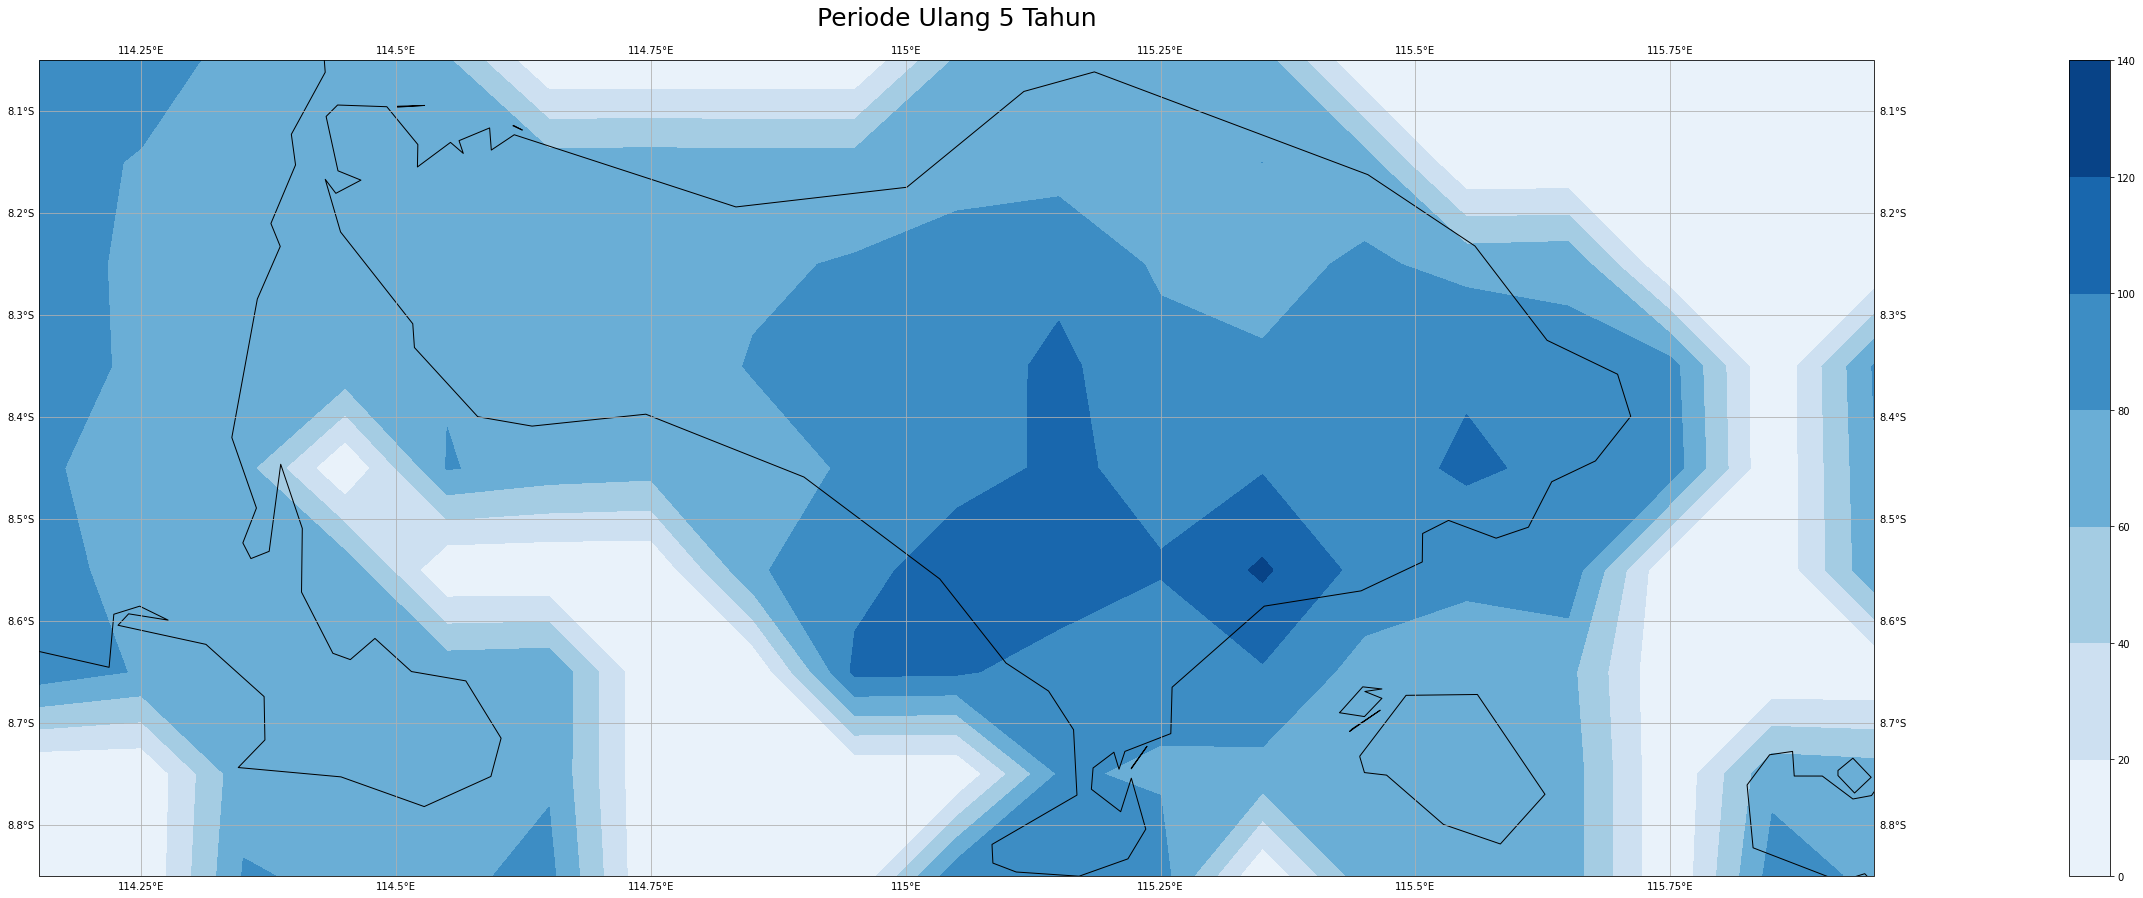

In [ ]:
mproj=ccrs.PlateCarree()

fig = plt.figure(figsize=(70,15))
ax = plt.axes(projection=mproj)

cf=ax.contourf(Bali.lon,Bali.lat,Mtrx_6,  
               cmap=plt.cm.Blues, 
               transform=mproj)  
cb = plt.colorbar(cf) 


ax.add_feature(cfeature.GSHHSFeature(scale='intermediate')) 
ax.gridlines(draw_labels=True) 

plt.title('Periode Ulang 5 Tahun', fontsize=25, pad=20)
plt.savefig('3.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.1,
        frameon=None, metadata=None)

#Download Gambar
from google.colab import files
files.download('3.png')